## About Dataset

#### **Overview**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

#### **Data Fields**

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable)

<div style="color:white;display:fill;border-radius:12px;background-color:#03112A;font-size:200%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>1.1 |</span></b> Importing the libraries </b></p></div>

- **<mark style="background-color:#FFC300;color:black;border-radius:5px;opacity:0.7"> Here we import the necessary libraries </mark>**

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sn
import missingno as msno
from datetime import datetime  as dtt

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sn.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
import pylab
import calendar
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import mean_squared_log_error

--------------------------------------------------------------

## 2.0 Reading The Dataset

We will combine the test and train datasets and then split them again, and then split the train to validation set and train set. 

In [2]:
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# print('Combined dataframe shape:', combined_df.shape)

In [3]:
train , validate = \
              np.split(train_df.sample(frac=1, random_state=0), [int(0.8*len(train_df))])
print(f'train dataframe shape:{ train.shape } and their percentage of the total data is {round(len( train)/len(train_df),2)}%')
print(f'validate dataframe shape:{validate.shape} and their percentage of the total data is {round(len( validate)/len(train_df),2)}%' )
# print(f'test dataframe shape:{test.shape} and their percentage of the total data is {round(len( test)/len(test_df),2)}%')

train dataframe shape:(8708, 12) and their percentage of the total data is 0.8%
validate dataframe shape:(2178, 12) and their percentage of the total data is 0.2%


#### 2.1-Data Summary

As a first step lets do three simple steps to get an overview of the dataset 

 - Size of the dataset
 - Get a glimpse of data by printing few rows of it.
 - What type of variables contribute our data

#### **2.2-Shape Of The Dataset**

In [4]:
df=train
df.shape

(8708, 12)

In [5]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335
1466,2011-04-06 23:00:00,2,0,1,1,18.86,22.725,41,19.9995,11,29,40
10710,2012-12-12 16:00:00,4,0,1,2,13.94,16.665,46,8.9981,19,310,329
5138,2011-12-08 04:00:00,4,0,1,2,9.84,9.850,60,31.0009,0,2,2
1726,2011-04-17 20:00:00,2,0,0,1,21.32,25.000,36,12.9980,44,97,141
3943,2011-09-15 08:00:00,3,0,1,1,26.24,30.305,73,8.9981,27,364,391


Droping the unwanted columns (casual and registered)

In [6]:
#  df = df.drop(['casual', 'registered'], axis=1)

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

######  HERE ALL THE VARIABLES OR FEATURES ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE count VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE count VARIABLE IS CONTINUOUS VARIED.

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.507694,0.028480,0.677538,1.417892,20.269763,23.697935,62.016766,12.840666,36.077630,155.773427,191.851056
std,1.115604,0.166348,0.467446,0.634766,7.801925,8.493927,19.268069,8.140119,49.944629,151.409121,181.529436
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,857.000000,970.000000


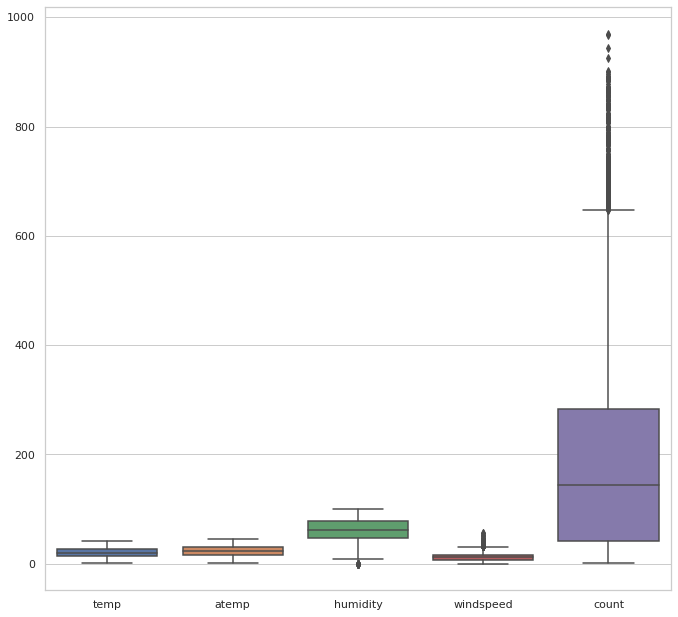

In [10]:

sn.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

--------------------------------------------------------------

## 4.0-Missing Values Analysis

Since we finished the structure of the columns, we can visualize missing values using "missingno" libarary 

In [11]:
df.isnull().sum()  # implies no null values and hence no imputation needed ::).


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

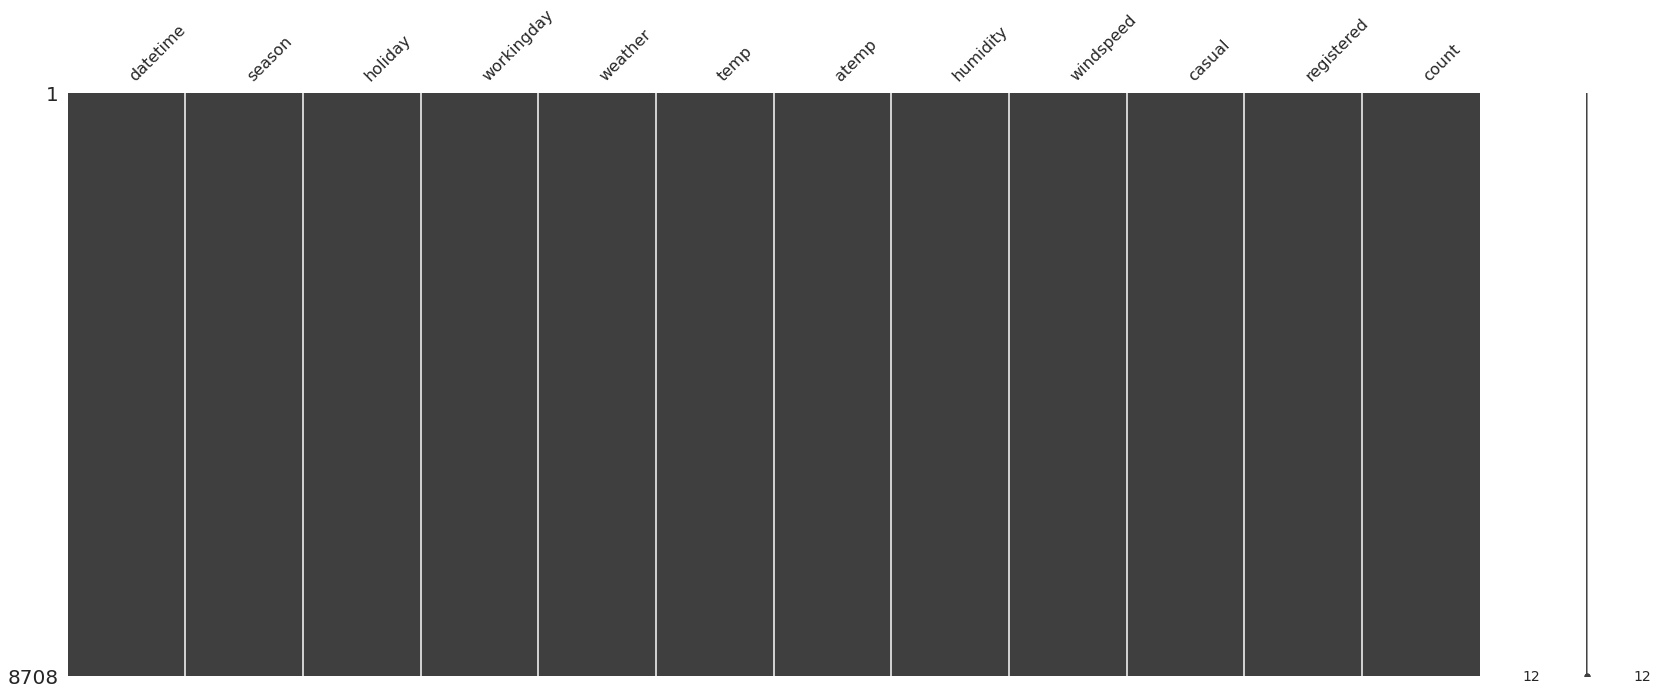

In [12]:
msno.matrix(df)  # just to visualize, no missing value.

In [13]:
# Display only the null values in the dataframe
nulls = df[df['count'].isnull()]

# Print the null values
print(nulls)

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


We got lucky this time as there no missing value in the dataset nd hence no imputation needed :) .

--------------------------------------------------------------

## 5.0- Visualizing Distribution 
Since we will predecit the count column we can see it Skewness and distribution 

### 5.1- Outliers & Skewness Detection

In [14]:
df.season.value_counts()

3    2196
4    2185
2    2182
1    2145
Name: season, dtype: int64

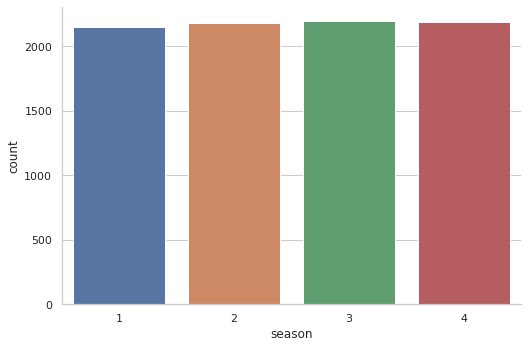

In [15]:
sn.catplot(x='season', data=df, kind='count', height=5, aspect=1.5)

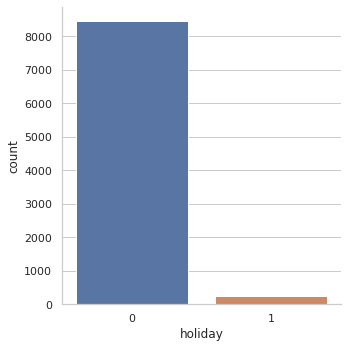

In [16]:
#holiday
df.holiday.value_counts()
sn.catplot(x='holiday',data=df,kind='count',aspect=1) 

**Majority of data is for non holiday days.**

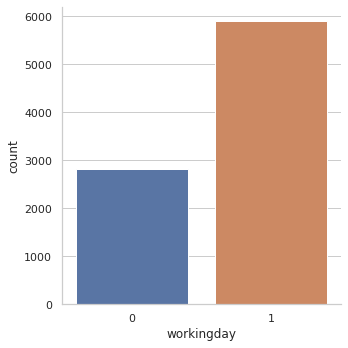

In [17]:
#holiday
df.workingday.value_counts()
sn.catplot(x='workingday',data=df,kind='count',aspect=1)

**Majority of data is for working days.**

In [18]:
#Weather Column
df.weather.value_counts()

1    5763
2    2252
3     692
4       1
Name: weather, dtype: int64

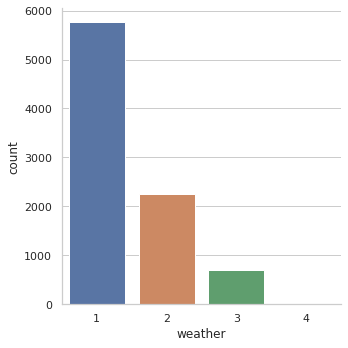

In [19]:
sn.catplot(x='weather',data=df,kind='count',aspect=1)  


####We wont change the encoding of weather as the model need numerical data<br>
 1-> spring<br>
 2-> summer <br> 
 3-> fall<br>
4-> winter

<Axes: xlabel='count', ylabel='Count'>

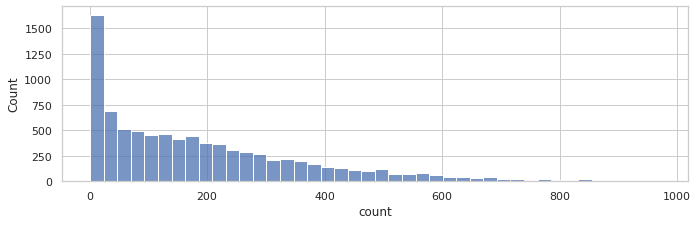

In [20]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 3)

sn.histplot(df["count"])

**As it is visible from the above figure that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. **

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

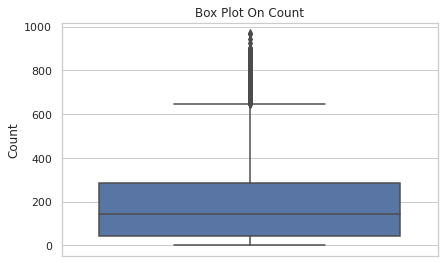

In [21]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 4)
fig1=sn.boxplot(data=df,y="count",orient="v",ax=axes)
fig1.set(ylabel='Count',title="Box Plot On Count")

**As it is visible from the above figure that "count" variable has outliers.**

### 5.2- Outliers Calculation using IQR

In [22]:
Q1_Count=df['count'].quantile(0.25)
Q1_Count

42.0

In [23]:
Q3_Count=df['count'].quantile(0.75)
Q3_Count

284.0

In [24]:
IQR=Q3_Count-Q1_Count
IQR

242.0

In [25]:
max_outlier=Q3_Count+1.5*IQR
max_outlier

647.0

**Conclusion: Outliers are above the count of  644.5** 


### 5.3- Dealing with outlier data points
Their is 2 possible solution for removing outlier data points:<br />
First one with the 1.5 IQR Method <br />
Second with the 3 sigma using Empirical Rule Methond

In [26]:
#3 sigma using Empirical Rule Methond
Empirical_Rule_method = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 
#1.5 IQR Method
IQR_method=df[ (df['count']<max_outlier)]
m=df[~(df['count']<max_outlier)]
m['count'].count()
Empirical_Rule_method

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335
...,...,...,...,...,...,...,...,...,...,...,...,...
3298,2011-08-07 08:00:00,3,0,0,1,29.52,34.850,79,12.9980,23,66,89
3372,2011-08-10 10:00:00,3,0,1,1,32.80,36.365,43,15.0013,41,72,113
7954,2012-06-11 19:00:00,2,0,1,2,31.16,34.090,48,22.0028,89,507,596
232,2011-01-10 23:00:00,1,0,1,1,5.74,7.575,59,11.0014,0,18,18


### 5.4- Dealing with Skewness
We can the log of the values to normalize the data

<Axes: xlabel='count', ylabel='Count'>

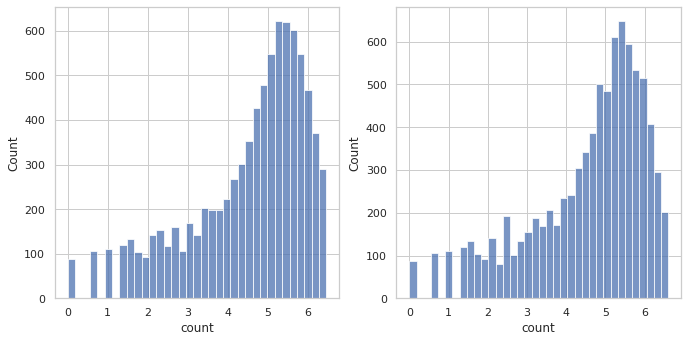

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)
sn.histplot(np.log(IQR_method['count']), ax=axes[0])
sn.histplot(np.log(Empirical_Rule_method['count']), ax=axes[1])

**From the above figures both methods are almost equivelent and so we will take the one with more rows to decrese the sampling error.** 

In [28]:
IQR_method['count'].count()

8464

In [29]:
Empirical_Rule_method['count'].count()# will use this one 

8593

In [30]:
df_with_regirsted_casual=df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 


[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season ')]

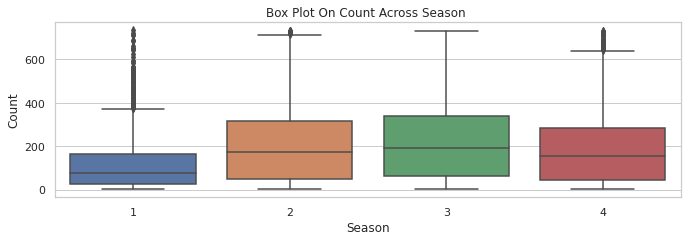

In [31]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 3)
figure2=sn.boxplot(data=Empirical_Rule_method,y="count",x="season",orient="v")# used the visualized_df here for clarity
figure2.set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season " )

**As shown from the previous figure their their is some similiarity "Summer","Fall","Winter" Seasons while the medain of the spring is less than others and has more outliers**

### 6.0 Correlation Analysis

<Axes: >

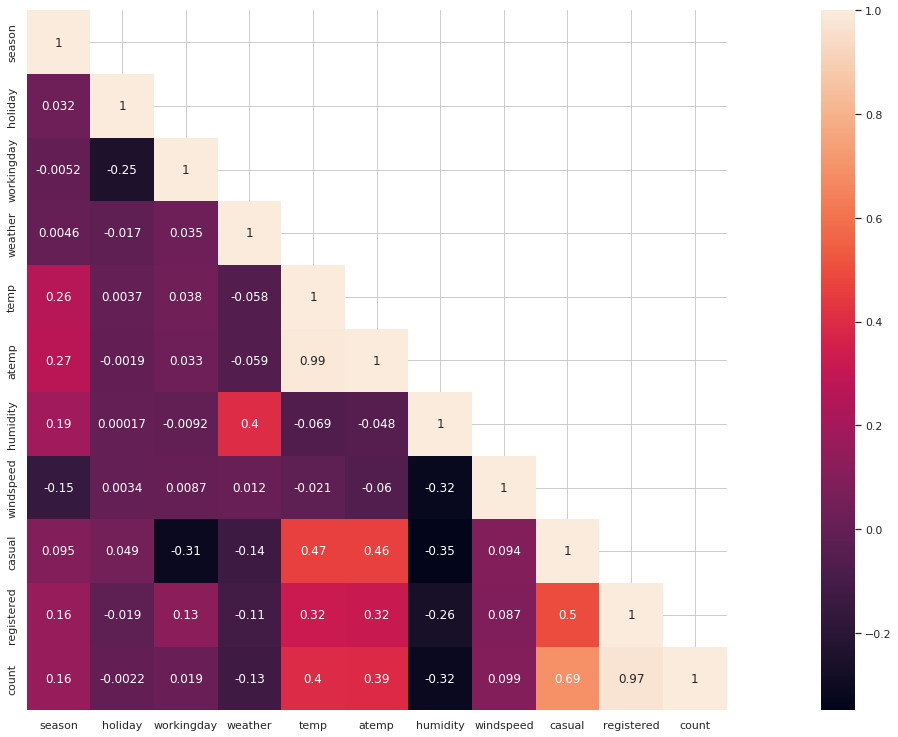

In [32]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False # to keep the missing values encountred in the heat map 
fig=plt.gcf()
fig.set_size_inches(30,12)
sn.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

######  INFERENCES FROM THE ABOVE HEATMAP--

1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. temp and atemp are highly related as expected.
 
3. humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4. also note that casual and working day are highly inversely related as you would expect.

5. Also note that count and holiday are highly inversely related as you would expect.

6. Also note that temp(or atemp) highly effects the count. 

7. Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that  weather is getting more worse and so lesser people will rent bikes.

8. registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

9. similarly we can draw some more inferences like weather and humidity and so on... .


## 3.0-Feature Engineering

In [33]:
# hot encoding season . to have better  features.
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)

# Renaming column for readability 
col_names = {'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'}
train = train.rename(columns=col_names)

train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,spring,summer,fall,winter
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244,1,0,0,0
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239,0,1,0,0
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229,1,0,0,0
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467,0,1,0,0
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,0,0,0


In [34]:
# same encdoing for the validation set 
season=pd.get_dummies(validate['season'],prefix='season')
validate=pd.concat([validate,season],axis=1)

# Renaming column for readability 
col_names = {'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'}
validate = validate.rename(columns=col_names)

validate.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,spring,summer,fall,winter
7866,2012-06-08 03:00:00,2,0,1,1,22.14,25.76,60,6.0032,0,8,8,0,1,0,0
6457,2012-03-06 07:00:00,1,0,1,1,6.56,9.09,55,8.9981,5,270,275,1,0,0,0
1355,2011-04-02 08:00:00,2,0,0,1,12.30,15.91,70,7.0015,10,45,55,0,1,0,0
5520,2012-01-05 03:00:00,1,0,1,1,8.20,12.88,61,0.0000,0,4,4,1,0,0,0
886,2011-03-01 09:00:00,1,0,1,1,9.02,9.85,55,27.9993,8,116,124,1,0,0,0


In [35]:
# same encdoing for the test set 
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)

# Renaming column for readability 
col_names = {'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'}
test = test.rename(columns=col_names)

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,spring,summer,fall,winter
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [36]:
# hot encoding weather . to have better  features.

weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)

# Renaming column for readability 
col_names = {'weather_1': 'Clear', 'weather_2': ' Cloudy', 'weather_3': 'Light', 'weather_4': 'Heavy Rain'}
train = train.rename(columns=col_names)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,spring,summer,fall,winter,Clear,Cloudy,Light,Heavy Rain
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244,1,0,0,0,1,0,0,0
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239,0,1,0,0,0,1,0,0
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229,1,0,0,0,1,0,0,0
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467,0,1,0,0,1,0,0,0
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,0,0,0,1,0,0,0


In [37]:
# same encdoing for the validation set 
weather=pd.get_dummies(validate['weather'],prefix='weather')
validate=pd.concat([validate,weather],axis=1)

# Renaming column for readability 
col_names = {'weather_1': 'Clear', 'weather_2': ' Cloudy', 'weather_3': 'Light', 'weather_4': 'Heavy Rain'}
validate = validate.rename(columns=col_names)

validate.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,spring,summer,fall,winter,Clear,Cloudy,Light
7866,2012-06-08 03:00:00,2,0,1,1,22.14,25.76,60,6.0032,0,8,8,0,1,0,0,1,0,0
6457,2012-03-06 07:00:00,1,0,1,1,6.56,9.09,55,8.9981,5,270,275,1,0,0,0,1,0,0
1355,2011-04-02 08:00:00,2,0,0,1,12.30,15.91,70,7.0015,10,45,55,0,1,0,0,1,0,0
5520,2012-01-05 03:00:00,1,0,1,1,8.20,12.88,61,0.0000,0,4,4,1,0,0,0,1,0,0
886,2011-03-01 09:00:00,1,0,1,1,9.02,9.85,55,27.9993,8,116,124,1,0,0,0,1,0,0


In [38]:

count = (train['Heavy Rain'] == 1).sum()

print(f"Number of rows with heavy rain = {count}")

Number of rows with heavy rain = 1


so we will insert a column in validate dataset. 

In [39]:
# Insert a new column called 'Heavy Rain' with zeros in all rows
validate['Heavy Rain'] = 0

In [40]:
#same encdoing for the validation set 
weather=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,weather],axis=1)


In [41]:

# Renaming column for readability 
col_names = {'weather_1': 'Clear', 'weather_2': ' Cloudy', 'weather_3': 'Light', 'weather_4': 'Heavy Rain'}
test = test.rename(columns=col_names)

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Cloudy,Light,Heavy Rain
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


### 3.1- 'datetime" column
As we see from the above results, the column "datetime" need to be drill down to "date,"hour","weekDay","month" columns.

In [42]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").weekday())
train["month"] = train.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").month)
train["weekday"] = train.date.apply(lambda dateStr : calendar.day_name[dtt.strptime(dateStr,"%Y-%m-%d").weekday()])


train 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,fall,winter,Clear,Cloudy,Light,Heavy Rain,date,hour,weekday,month
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,...,0,0,1,0,0,0,2012-03-13,21,Tuesday,3
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,...,0,0,0,1,0,0,2012-06-12,16,Tuesday,6
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,...,0,0,1,0,0,0,2012-02-02,16,Thursday,2
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,...,0,0,1,0,0,0,2012-06-15,19,Friday,6
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,...,0,0,1,0,0,0,2012-02-01,19,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,2011-08-07 08:00:00,3,0,0,1,29.52,34.850,79,12.9980,23,...,1,0,1,0,0,0,2011-08-07,08,Sunday,8
3372,2011-08-10 10:00:00,3,0,1,1,32.80,36.365,43,15.0013,41,...,1,0,1,0,0,0,2011-08-10,10,Wednesday,8
7954,2012-06-11 19:00:00,2,0,1,2,31.16,34.090,48,22.0028,89,...,0,0,0,1,0,0,2012-06-11,19,Monday,6
232,2011-01-10 23:00:00,1,0,1,1,5.74,7.575,59,11.0014,0,...,0,0,1,0,0,0,2011-01-10,23,Monday,1


In [43]:

train['date'] = pd.to_datetime(train['date'])
train['day'] = train['date'].dt.day



In [44]:
validate["date"] = validate.datetime.apply(lambda x : x.split()[0])
validate["hour"] = validate.datetime.apply(lambda x : x.split()[1].split(":")[0])
validate["weekday"] = validate.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").weekday())
validate["month"] = validate.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").month)
validate

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,fall,winter,Clear,Cloudy,Light,Heavy Rain,date,hour,weekday,month
7866,2012-06-08 03:00:00,2,0,1,1,22.14,25.760,60,6.0032,0,...,0,0,1,0,0,0,2012-06-08,03,4,6
6457,2012-03-06 07:00:00,1,0,1,1,6.56,9.090,55,8.9981,5,...,0,0,1,0,0,0,2012-03-06,07,1,3
1355,2011-04-02 08:00:00,2,0,0,1,12.30,15.910,70,7.0015,10,...,0,0,1,0,0,0,2011-04-02,08,5,4
5520,2012-01-05 03:00:00,1,0,1,1,8.20,12.880,61,0.0000,0,...,0,0,1,0,0,0,2012-01-05,03,3,1
886,2011-03-01 09:00:00,1,0,1,1,9.02,9.850,55,27.9993,8,...,0,0,1,0,0,0,2011-03-01,09,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,21,...,0,1,0,0,1,0,2011-11-15,13,1,11
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,51,...,1,0,1,0,0,0,2011-08-05,22,4,8
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,...,0,1,1,0,0,0,2012-10-14,14,6,10
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,19,...,0,1,0,1,0,0,2012-12-16,09,6,12


In [45]:
validate['date'] = pd.to_datetime(validate['date'])
validate['day'] = validate['date'].dt.day



In [46]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"] = test.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").weekday())
test["month"] = test.date.apply(lambda x : dtt.strptime(x,"%Y-%m-%d").month)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,spring,...,fall,winter,Clear,Cloudy,Light,Heavy Rain,date,hour,weekday,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,...,0,0,1,0,0,0,2011-01-20,00,3,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,2011-01-20,01,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,2011-01-20,02,3,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,2011-01-20,03,3,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,2011-01-20,04,3,1


In [47]:

test['date'] = pd.to_datetime(test['date'])
test['day'] = test['date'].dt.day
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,winter,Clear,Cloudy,Light,Heavy Rain,date,hour,weekday,month,day
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,...,0,1,0,0,0,2012-03-13,21,Tuesday,3,13
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,...,0,0,1,0,0,2012-06-12,16,Tuesday,6,12
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,...,0,1,0,0,0,2012-02-02,16,Thursday,2,2
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,...,0,1,0,0,0,2012-06-15,19,Friday,6,15
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,...,0,1,0,0,0,2012-02-01,19,Wednesday,2,1


### 3.2-Dropping Unncessary Column
 Now we can Drop the datetime column as we already extracted useful features from it.

In [48]:
train  = train.drop(["datetime"],axis=1)
test  = test.drop(["datetime"],axis=1)
validate  = validate.drop(["datetime"],axis=1)


train  = train.drop(["date"],axis=1)
test  = test.drop(["date"],axis=1)
validate  = validate.drop(["date"],axis=1)



[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour Of The Day')]

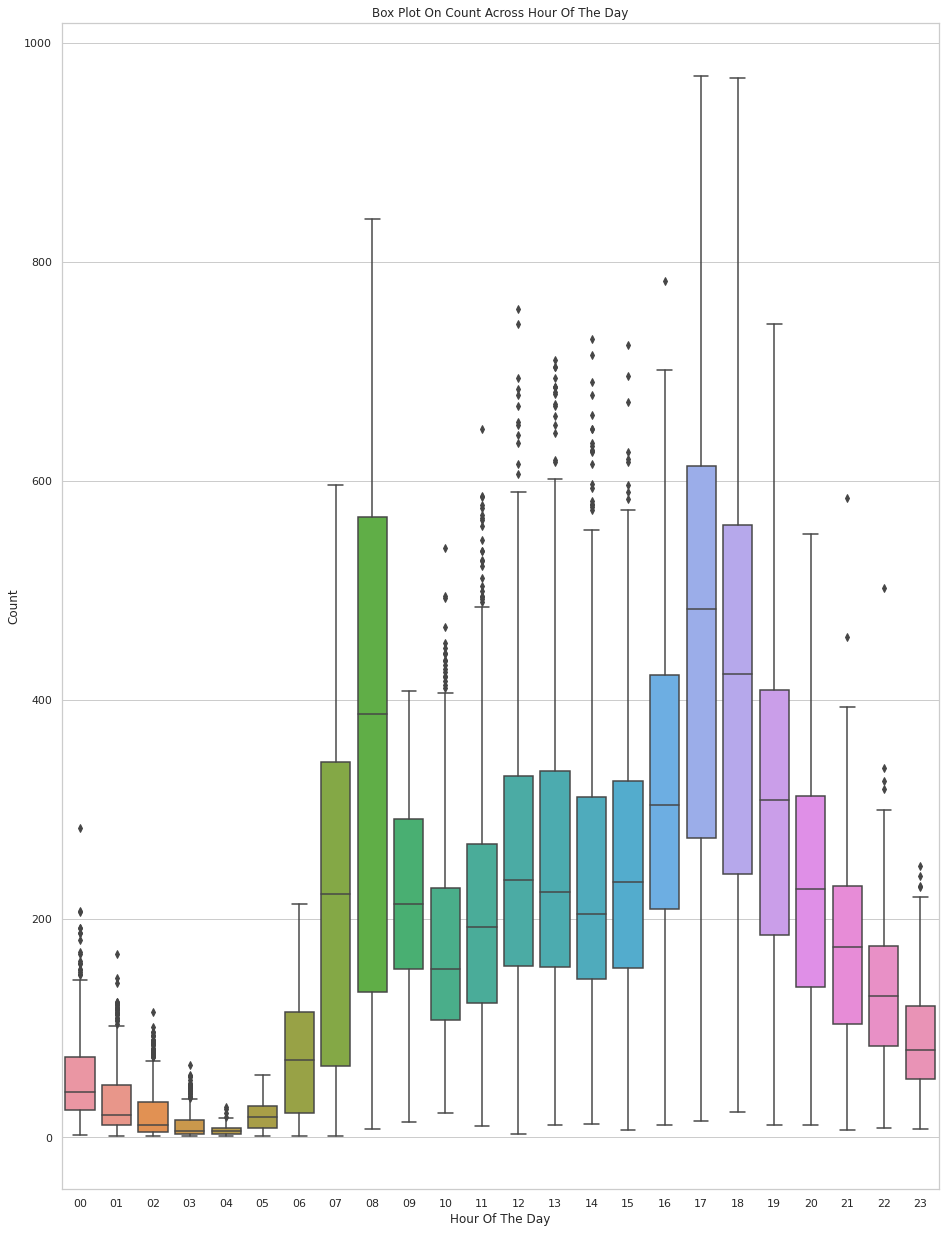

In [49]:
fig, axes = plt.subplots()
fig.set_size_inches(14, 20)

hours = sorted(train['hour'].unique())


fig4 = sn.boxplot(data=train, y='count', x='hour', orient='v', order=hours)
fig4.set(xlabel='Hour Of The Day', ylabel='Count', title='Box Plot On Count Across Hour Of The Day')

**From the above figure it is clears that peak hours are 8,17 and 18 **

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

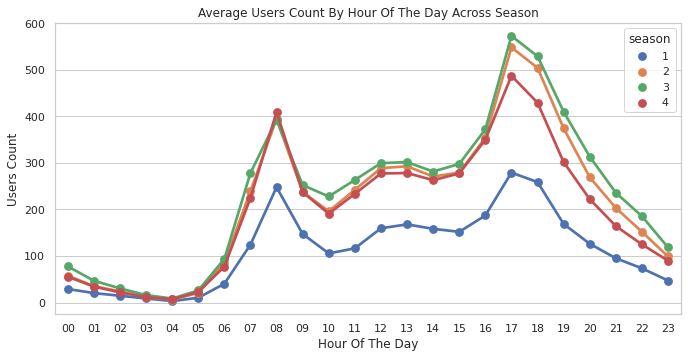

In [50]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(10,5)

hourAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')



[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'column chart On Count Across Working Day')]

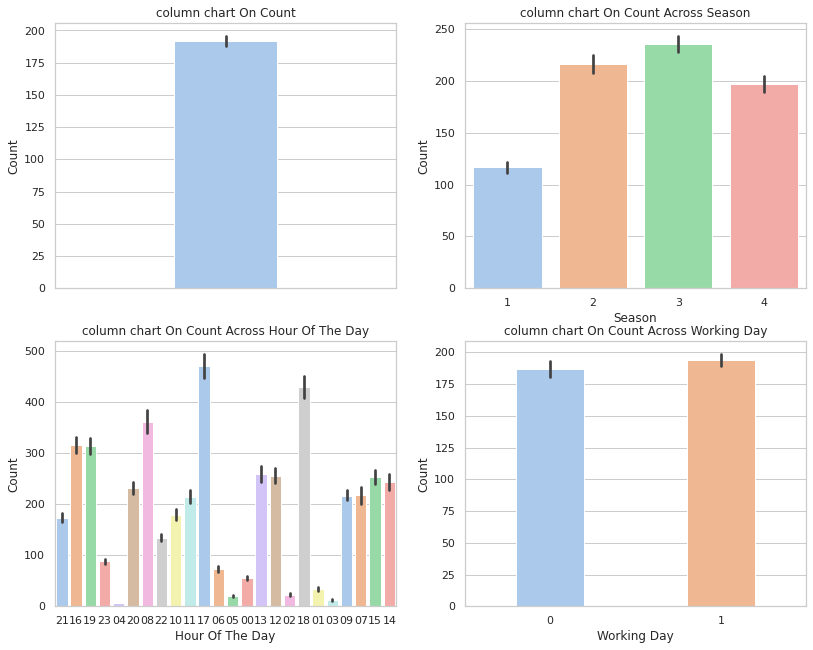

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sn.barplot(data=train,y="count"                  , orient="v", width=0.3, palette = "pastel", ax=axes[0][0])
sn.barplot(data=train,y="count", x = "season"    , orient="v", width=0.8, palette = "pastel", ax=axes[0][1])
sn.barplot(data=train,y="count", x = "hour"      , orient="v", width=0.8, palette = "pastel", ax=axes[1][0])
sn.barplot(data=train,y="count", x = "workingday", orient="v", width=0.4, palette = "pastel", ax=axes[1][1])

axes[0][0].set(ylabel='Count'                          , title="column chart On Count")
axes[0][1].set(xlabel='Season'         , ylabel='Count', title="column chart On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title="column chart On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day'    , ylabel='Count', title="column chart On Count Across Working Day")

#### 6.1 Dropping unwanted columns

In [52]:
# # # now can drop weather and season.
train.drop(['season','weather'],inplace=True,axis=1)
validate.drop(['season','weather'],inplace=True,axis=1)
test.drop(['season','weather'],inplace=True,axis=1)

In [53]:

train.columns 




Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'spring', 'summer', 'fall', 'winter',
       'Clear', ' Cloudy', 'Light', 'Heavy Rain', 'hour', 'weekday', 'month',
       'day'],
      dtype='object')

In [54]:
validate.columns 

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'spring', 'summer', 'fall', 'winter',
       'Clear', ' Cloudy', 'Light', 'Heavy Rain', 'hour', 'weekday', 'month',
       'day'],
      dtype='object')

In [55]:
test.columns 

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'spring', 'summer', 'fall', 'winter', 'Clear', ' Cloudy', 'Light',
       'Heavy Rain', 'hour', 'weekday', 'month', 'day'],
      dtype='object')

## 7.0 Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

 - It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that
   season.Therefore June, July and August has got relatively higher
   demand for bicycle.
 - On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. 
 - Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
 - The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

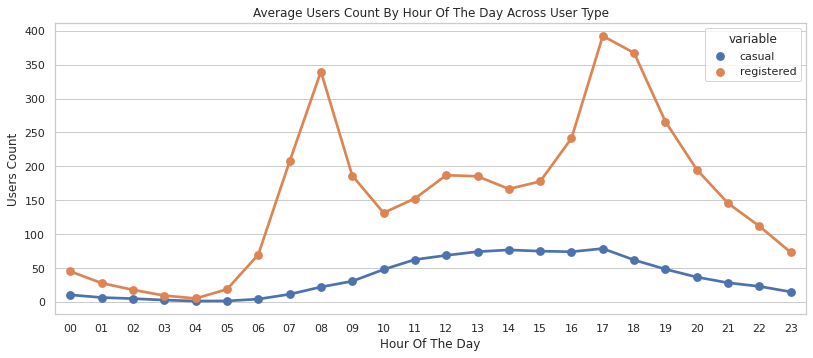

In [56]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [57]:
train['weekday'] = train['weekday'].astype(str)

In [58]:
train['weekday'] = pd.Categorical(train['weekday'],categories=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], ordered=True)

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average casual Users Count By Hour Of The Day Across Weekdays'),
 None]

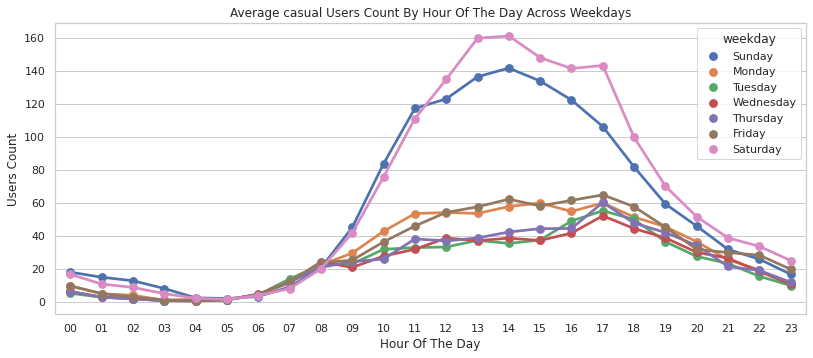

In [59]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)



hourAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["casual"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["casual"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average casual Users Count By Hour Of The Day Across Weekdays",label='big')


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

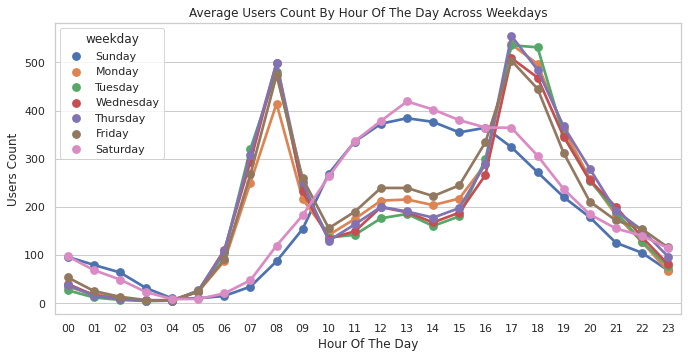

In [60]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(10,5)

hourAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')



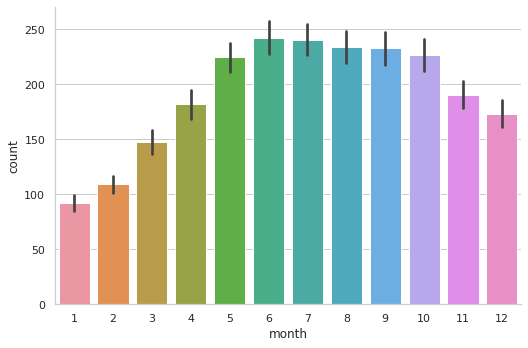

In [61]:
sn.catplot(x="month",y="count",data=train,kind='bar',aspect=1.5)



In [62]:
train.drop(['casual','registered'],inplace=True,axis=1)

#test.drop(['casual','registered'],inplace=True,axis=1)# already dropped 

validate.drop(['casual','registered'],inplace=True,axis=1)


<Axes: xlabel='atemp', ylabel='count'>

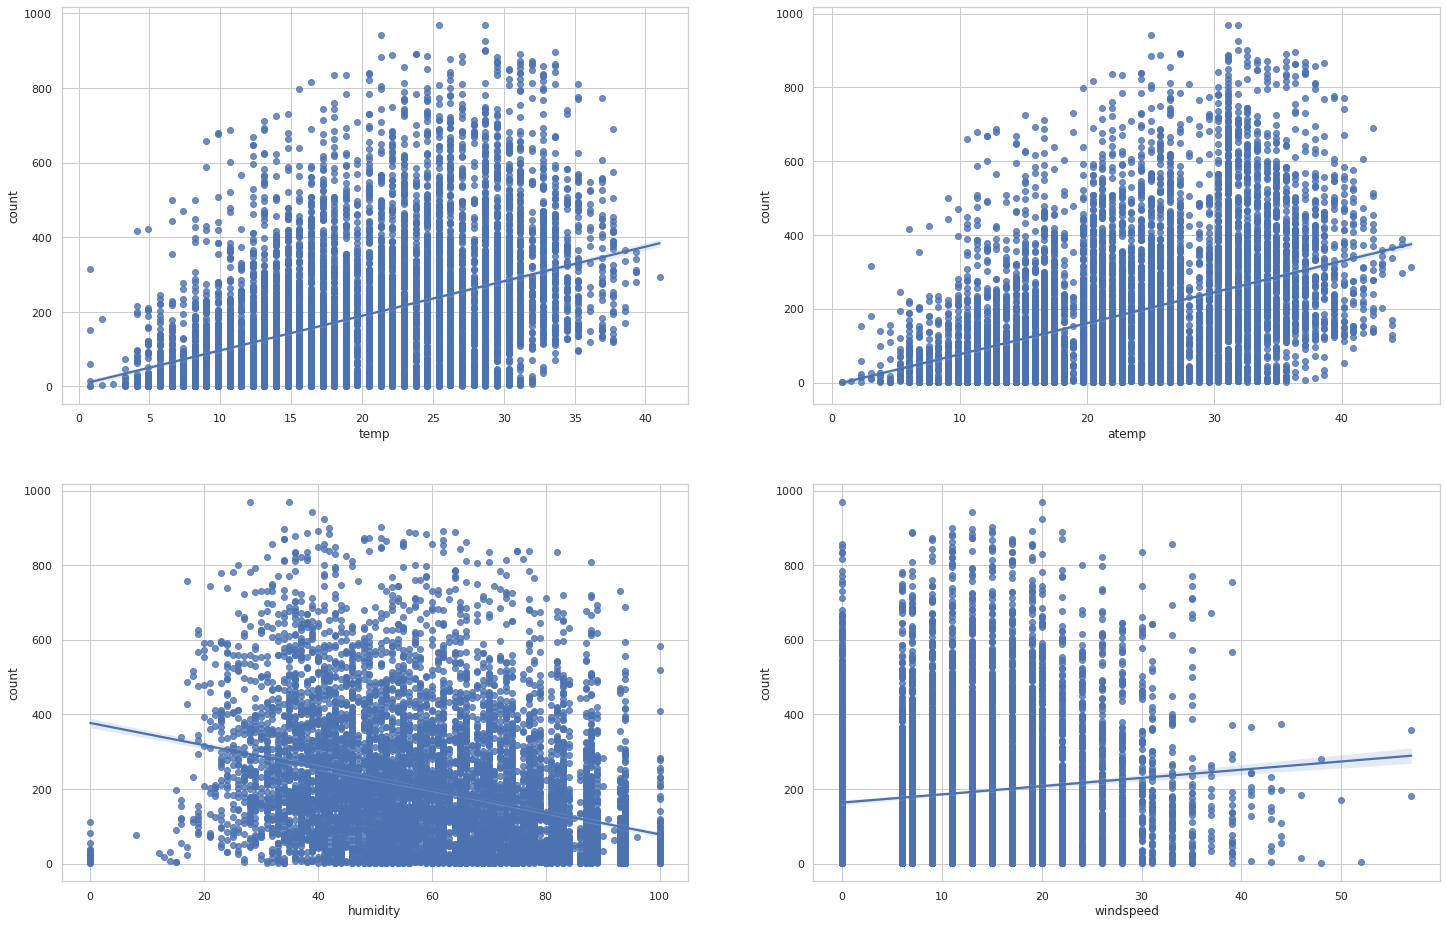

In [63]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(22, 15)
sn.regplot(x="temp", y="count", data=train,ax=axes[0][0])
sn.regplot(x="windspeed", y="count", data=train,ax=axes[1][1])
sn.regplot(x="humidity", y="count", data=train,ax=axes[1][0])
sn.regplot(x="atemp", y="count", data=train,ax=axes[0][1])


## Splitting data ##

In [64]:
train  = train.drop(["weekday"],axis=1)
test  = test.drop(["weekday"],axis=1)
validate  = validate.drop(["weekday"],axis=1)


In [65]:
test

,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Cloudy,Light,Heavy Rain,hour,month,day
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,00,1,20
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,01,1,20
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,02,1,20
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,03,1,20
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,04,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0,19,12,31
6489,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0,20,12,31
6490,0,1,10.66,12.880,60,11.0014,1,0,0,0,1,0,0,0,21,12,31
6491,0,1,10.66,13.635,56,8.9981,1,0,0,0,1,0,0,0,22,12,31


In [66]:
train.sort_index()

,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,fall,winter,Clear,Cloudy,Light,Heavy Rain,hour,month,day
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0,01,1,1
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0,02,1,1
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0,03,1,1
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0,04,1,1
5,0,0,9.84,12.880,75,6.0032,1,1,0,0,0,0,1,0,0,05,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,0,1,17.22,21.210,50,23.9994,334,0,0,0,1,1,0,0,0,16,12,19
10879,0,1,16.40,20.455,50,26.0027,562,0,0,0,1,1,0,0,0,17,12,19
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0,19,12,19
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0,20,12,19


In [67]:
validate.sort_index()

,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,fall,winter,Clear,Cloudy,Light,Heavy Rain,hour,month,day
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0,00,1,1
13,0,0,18.86,22.725,72,19.9995,94,1,0,0,0,0,1,0,0,13,1,1
21,0,0,16.40,20.455,87,12.9980,34,1,0,0,0,0,1,0,0,21,1,1
25,0,0,18.04,21.970,94,16.9979,17,1,0,0,0,0,1,0,0,01,1,2
26,0,0,17.22,21.210,100,19.0012,9,1,0,0,0,0,1,0,0,02,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10866,0,1,9.84,12.120,75,8.9981,7,0,0,0,1,1,0,0,0,04,12,19
10868,0,1,9.84,12.880,75,6.0032,112,0,0,0,1,1,0,0,0,06,12,19
10880,0,1,15.58,19.695,50,23.9994,569,0,0,0,1,1,0,0,0,18,12,19
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0,21,12,19


In [68]:
from sklearn.model_selection import train_test_split,cross_validate
x_train=train.drop('count',axis=1)
x_test=validate.drop('count',axis=1) 

y_train= train['count']
y_test=validate['count']


In [69]:
from sklearn.metrics import mean_squared_log_error

models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), KNeighborsRegressor()]
model_names = ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor']
msle = []
out = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_test)
    msle.append(mean_squared_log_error(y_test, test_pred))
    
out = {'Modelling Algo': model_names, 'MSLE': msle}
print(out)

{'Modelling Algo': ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor'], 'MSLE': [0.16691116253896107, 1.0618386443199335, 0.17450716890329065, 0.9013724494504097]}


In [71]:
msle_frame=pd.DataFrame(out)
msle_frame

,Modelling Algo,MSLE
0,RandomForestRegressor,0.166911
1,AdaBoostRegressor,1.061839
2,BaggingRegressor,0.174507
3,KNeighborsRegressor,0.901372


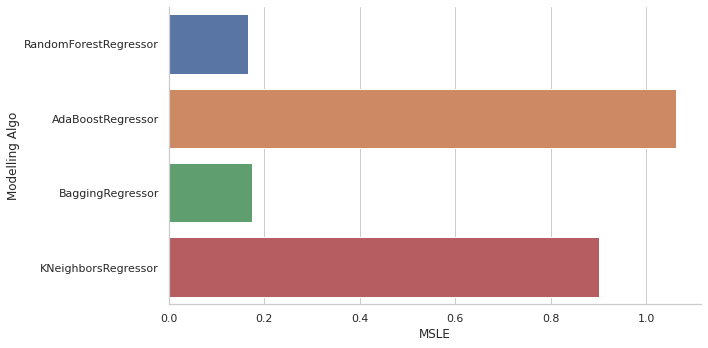

In [72]:
sn.catplot(y='Modelling Algo',x='MSLE',data=msle_frame,kind='bar',aspect=2)


## After validation time to test the model on test dataset from kaglle 

In [74]:
# Append train  to validate 
df_train_validated = train.append(validate)



In [ ]:

x_train=df_train_validated.drop('count',axis=1)
x_test=test.drop('count',axis=1) 

y_train= df_train_validated['count']
y_test=test['count']

In [75]:
models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), KNeighborsRegressor()]
model_names = ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor']
msle = []
out = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_test)
    msle.append(mean_squared_log_error(y_test, test_pred))
    
out = {'Modelling Algo': model_names, 'MSLE': msle}
print(out)

{'Modelling Algo': ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'KNeighborsRegressor'], 'MSLE': [0.16742832238209568, 0.9370608438846688, 0.1786503983444022, 0.9013724494504097]}


In [76]:
msle_frame=pd.DataFrame(out)
msle_frame

,Modelling Algo,MSLE
0,RandomForestRegressor,0.167428
1,AdaBoostRegressor,0.937061
2,BaggingRegressor,0.178650
3,KNeighborsRegressor,0.901372


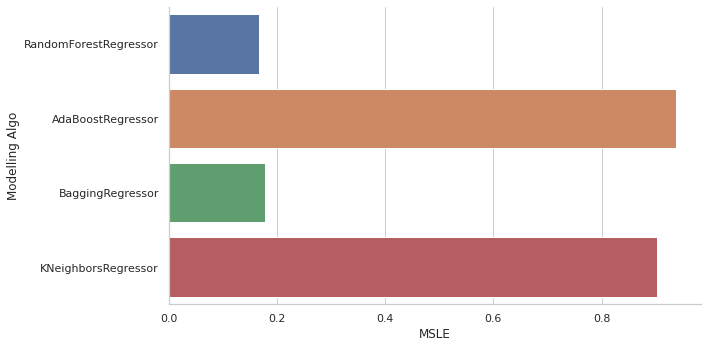

In [77]:
sn.catplot(y='Modelling Algo',x='MSLE',data=msle_frame,kind='bar',aspect=2)
